In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [2]:
job=pd.read_csv("\\Users\\piyus\\Documents\\machine learning\\py-master\\ML\\2_linear_reg_multivariate\\Exercise\\hiring.csv")
job

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
#filling na values
job['experience']=job['experience'].fillna("0")

In [4]:
job

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
#converting string into numeric
from word2number import w2n

job.iloc[2,0]=w2n.word_to_num('five')
job.iloc[3,0]=w2n.word_to_num('two')
job.iloc[4,0]=w2n.word_to_num('seven')
job.iloc[5,0]=w2n.word_to_num('three')
job.iloc[6,0]=w2n.word_to_num('ten')
job.iloc[7,0]=w2n.word_to_num('eleven')

In [6]:
job

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
job['test_score(out of 10)']=job['test_score(out of 10)'].fillna(job['test_score(out of 10)'].median())
job

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [8]:
job.corr()

,test_score(out of 10),interview_score(out of 10),salary($)
test_score(out of 10),1.000000,0.130871,0.009965
interview_score(out of 10),0.130871,1.000000,0.037820
salary($),0.009965,0.037820,1.000000


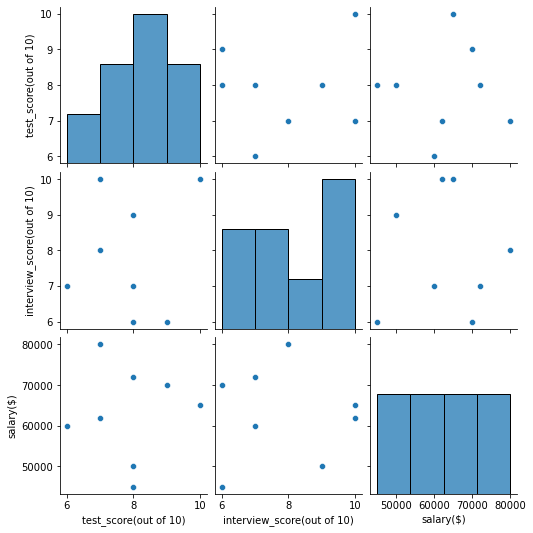

In [9]:
sns.pairplot(job)

In [10]:
#spliting data into x and y
X=job.iloc[:,0:3]
Y=job.iloc[:,-1]


In [11]:
#creating Regression model
model=linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [12]:
#predicting salary
pred=model.predict(X)
pred

array([52350.0727802 , 45734.35225619, 58312.95487627, 63872.63464338,
       67270.74235808, 61148.47161572, 76069.1411936 , 79241.63027656])

In [13]:
job[['Predicted_Salary']]=pred
job

,experience,test_score(out of 10),interview_score(out of 10),salary($),Predicted_Salary
0,0,8.0,9,50000,52350.072780
1,0,8.0,6,45000,45734.352256
2,5,6.0,7,60000,58312.954876
3,2,10.0,10,65000,63872.634643
4,7,9.0,6,70000,67270.742358
5,3,7.0,10,62000,61148.471616
6,10,8.0,7,72000,76069.141194
7,11,7.0,8,80000,79241.630277


In [14]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [15]:
model.intercept_

17737.26346433771

In [16]:
#predicting the salary for values ouside of dataset

In [17]:
# person1= 2 year exp, 9 marks in test,   6 marks in interview
# person1= 12 year exp, 10 marks in test, 10 marks in interview

In [18]:
#person1
2812.95487627*2+1845.70596798*9+2205.24017467*6+17737.26346433771

53205.967976717715

In [19]:
#person2
2812.95487627*12+1845.70596798*10+2205.24017467*10+17737.26346433771

92002.1834060777